In [12]:
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}

all_rows = []
column_headers = []
for i in range(1,21):
  url = f'https://www.screener.in/screens/355742/top-500-companies/?page={i}'

  response = req.get(url, headers=request_header)
  soup = BeautifulSoup(response.text, 'html.parser')

  if i == 1:
    headers = []
    for th in soup.find_all('th'):
        headers.append(th.text.strip())
    column_headers = headers

  for row in soup.find_all('tr')[1:]:
      row_data = []
      for cell in row.find_all('td'):
          row_data.append(cell.text.strip())

      if len(row_data) < len(headers):
          diff = len(headers) - len(row_data)
          for _ in range(diff):
              row_data.append('')

      all_rows.append(row_data)

time.sleep(1)
df = pd.DataFrame(all_rows, columns=column_headers) 

In [14]:
df

,S.No.,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,...,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
0,1.,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,...,,,,,,,,,,
1,2.,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,...,,,,,,,,,,
2,3.,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,...,,,,,,,,,,
3,4.,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,...,,,,,,,,,,
4,5.,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,496.,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,...,,,,,,,,,,
516,497.,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,...,,,,,,,,,,
517,498.,Allied Blenders,389.95,55.98,10907.30,0.92,78.62,3362.24,920.65,19.94,...,,,,,,,,,,
518,499.,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,...,,,,,,,,,,


In [15]:
df.describe()

,S.No.,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,...,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
count,520,520,520,520,520,520,520,520,520,520,...,520,520,520,520,520,520,520,520,520,520
unique,501,501,500,473,501,206,499,489,501,476,...,1,1,1,1,1,1,1,1,1,1
top,,,,,,0.00,,,,,...,,,,,,,,,,
freq,20,20,20,37,20,84,20,21,20,21,...,520,520,520,520,520,520,520,520,520,520


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   S.No.                                 520 non-null    object
 1   Name                                  520 non-null    object
 2   CMP
                    Rs.           520 non-null    object
 3   P/E                                   520 non-null    object
 4   Mar Cap
                    Rs.Cr.    520 non-null    object
 5   Div Yld
                    %         520 non-null    object
 6   NP Qtr
                    Rs.Cr.     520 non-null    object
 7   Qtr Profit Var
                    %  520 non-null    object
 8   Sales Qtr
                    Rs.Cr.  520 non-null    object
 9   Qtr Sales Var
                    %   520 non-null    object
 10  ROCE
                    %            520 non-null    object
 11  ROE 5Yr
                    %   

In [17]:
df.isna().sum()

S.No.                                    0
Name                                     0
CMP\n                    Rs.             0
P/E                                      0
Mar Cap\n                    Rs.Cr.      0
Div Yld\n                    %           0
NP Qtr\n                    Rs.Cr.       0
Qtr Profit Var\n                    %    0
Sales Qtr\n                    Rs.Cr.    0
Qtr Sales Var\n                    %     0
ROCE\n                    %              0
ROE 5Yr\n                    %           0
ROE 3Yr\n                    %           0
ROE 7Yr\n                    %           0
S.No.                                    0
Name                                     0
CMP\n                    Rs.             0
P/E                                      0
Mar Cap\n                    Rs.Cr.      0
Div Yld\n                    %           0
NP Qtr\n                    Rs.Cr.       0
Qtr Profit Var\n                    %    0
Sales Qtr\n                    Rs.Cr.    0
Qtr Sales V

In [18]:
df.drop(columns=['S.No.'], inplace=True)
df

,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,...,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
0,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,...,,,,,,,,,,
1,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,...,,,,,,,,,,
2,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,...,,,,,,,,,,
3,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,...,,,,,,,,,,
4,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,11.09,...,,,,,,,,,,
516,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,20.61,...,,,,,,,,,,
517,Allied Blenders,389.95,55.98,10907.30,0.92,78.62,3362.24,920.65,19.94,21.07,...,,,,,,,,,,
518,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,25.47,...,,,,,,,,,,


In [19]:
df.to_csv('uncleaned.csv', index = False)   

In [20]:
df = pd.read_csv('uncleaned.csv')
dfc = df.dropna(axis = 1, how = 'all') 
dfc

,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
0,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,8.51,8.89,8.91
1,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,16.15,16.01,16.24
2,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,46.84,50.30,43.96
3,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,16.96,19.35,13.72
4,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,16.81,18.02,14.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,11.09,11.82,9.14,13.19
516,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,20.61,19.40,17.27,18.27
517,Allied Blenders,389.95,55.98,10907.30,0.92,78.62,3362.24,920.65,19.94,21.07,7.96,11.13,NaN
518,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,25.47,13.95,17.38,13.53


In [21]:
dfc.describe() 

,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
count,500.000000,483.000000,5.000000e+02,500.000000,500.000000,499.000000,500.000000,499.000000,497.000000,457.000000,481.000000,410.000000
mean,2612.122720,62.225072,8.112007e+04,0.911020,875.977620,118.399479,8148.140300,16.314108,19.268330,16.292670,16.858191,15.926000
std,7732.158058,111.100309,1.648718e+05,1.444526,2364.253812,886.949843,23061.073579,39.425511,14.779623,11.611896,12.561802,10.223836
min,7.370000,5.450000,1.087721e+04,0.000000,-6609.300000,-222.440000,6.650000,-71.230000,-32.130000,-23.350000,-27.680000,-17.060000
25%,393.575000,26.035000,1.705577e+04,0.120000,100.347500,-6.015000,918.335000,2.775000,9.960000,10.480000,10.730000,10.450000
50%,914.000000,42.020000,3.210635e+04,0.460000,205.815000,16.240000,2095.335000,10.750000,16.820000,15.520000,15.840000,14.865000
75%,2108.875000,63.480000,8.287790e+04,1.130000,552.875000,45.610000,5505.060000,20.200000,24.930000,20.540000,20.950000,20.202500
max,140265.000000,1681.130000,1.970869e+06,16.320000,22611.000000,16210.180000,261388.000000,482.380000,112.440000,107.800000,106.530000,90.740000


In [22]:
dfc.to_csv('Top500.csv', index = False) 

In [23]:
dfc 

,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
0,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,8.51,8.89,8.91
1,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,16.15,16.01,16.24
2,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,46.84,50.30,43.96
3,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,16.96,19.35,13.72
4,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,16.81,18.02,14.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,11.09,11.82,9.14,13.19
516,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,20.61,19.40,17.27,18.27
517,Allied Blenders,389.95,55.98,10907.30,0.92,78.62,3362.24,920.65,19.94,21.07,7.96,11.13,NaN
518,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,25.47,13.95,17.38,13.53


In [24]:
dfc.drop_duplicates(inplace=True)  


C:\Users\karti\AppData\Local\Temp\ipykernel_18928\3751293949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.drop_duplicates(inplace=True)


In [25]:
dfc.dropna(subset=['Name'], inplace=True)
dfc = dfc[dfc['Name'].str.strip() != '']  

C:\Users\karti\AppData\Local\Temp\ipykernel_18928\4018913593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.dropna(subset=['Name'], inplace=True)


In [26]:
dfc 

,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
0,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,8.51,8.89,8.91
1,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,16.15,16.01,16.24
2,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,46.84,50.30,43.96
3,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,16.96,19.35,13.72
4,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,16.81,18.02,14.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,11.09,11.82,9.14,13.19
516,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,20.61,19.40,17.27,18.27
517,Allied Blenders,389.95,55.98,10907.30,0.92,78.62,3362.24,920.65,19.94,21.07,7.96,11.13,NaN
518,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,25.47,13.95,17.38,13.53


In [27]:
dfc.isnull().sum() 

Name                                      0
CMP\n                    Rs.              0
P/E                                      17
Mar Cap\n                    Rs.Cr.       0
Div Yld\n                    %            0
NP Qtr\n                    Rs.Cr.        0
Qtr Profit Var\n                    %     1
Sales Qtr\n                    Rs.Cr.     0
Qtr Sales Var\n                    %      1
ROCE\n                    %               3
ROE 5Yr\n                    %           43
ROE 3Yr\n                    %           19
ROE 7Yr\n                    %           90
dtype: int64

In [28]:
dfc.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 519
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  500 non-null    object 
 1   CMP
                    Rs.           500 non-null    float64
 2   P/E                                   483 non-null    float64
 3   Mar Cap
                    Rs.Cr.    500 non-null    float64
 4   Div Yld
                    %         500 non-null    float64
 5   NP Qtr
                    Rs.Cr.     500 non-null    float64
 6   Qtr Profit Var
                    %  499 non-null    float64
 7   Sales Qtr
                    Rs.Cr.  500 non-null    float64
 8   Qtr Sales Var
                    %   499 non-null    float64
 9   ROCE
                    %            497 non-null    float64
 10  ROE 5Yr
                    %         457 non-null    float64
 11  ROE 3Yr
                

In [29]:
cleaned_df = dfc.dropna() 

In [30]:
cleaned_df 

,Name,CMP\n Rs.,P/E,Mar Cap\n Rs.Cr.,Div Yld\n %,NP Qtr\n Rs.Cr.,Qtr Profit Var\n %,Sales Qtr\n Rs.Cr.,Qtr Sales Var\n %,ROCE\n %,ROE 5Yr\n %,ROE 3Yr\n %,ROE 7Yr\n %
0,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,8.51,8.89,8.91
1,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,16.15,16.01,16.24
2,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,46.84,50.30,43.96
3,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,16.96,19.35,13.72
4,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,16.81,18.02,14.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,JM Financial,115.18,14.23,11009.40,2.34,235.02,782.36,1003.92,-20.37,9.39,7.18,5.67,7.96
515,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,11.09,11.82,9.14,13.19
516,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,20.61,19.40,17.27,18.27
518,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,25.47,13.95,17.38,13.53


In [31]:
cleaned_df.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 0 to 519
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  402 non-null    object 
 1   CMP
                    Rs.           402 non-null    float64
 2   P/E                                   402 non-null    float64
 3   Mar Cap
                    Rs.Cr.    402 non-null    float64
 4   Div Yld
                    %         402 non-null    float64
 5   NP Qtr
                    Rs.Cr.     402 non-null    float64
 6   Qtr Profit Var
                    %  402 non-null    float64
 7   Sales Qtr
                    Rs.Cr.  402 non-null    float64
 8   Qtr Sales Var
                    %   402 non-null    float64
 9   ROCE
                    %            402 non-null    float64
 10  ROE 5Yr
                    %         402 non-null    float64
 11  ROE 3Yr
                

In [32]:
cleaned_df.isna().sum() 

Name                                     0
CMP\n                    Rs.             0
P/E                                      0
Mar Cap\n                    Rs.Cr.      0
Div Yld\n                    %           0
NP Qtr\n                    Rs.Cr.       0
Qtr Profit Var\n                    %    0
Sales Qtr\n                    Rs.Cr.    0
Qtr Sales Var\n                    %     0
ROCE\n                    %              0
ROE 5Yr\n                    %           0
ROE 3Yr\n                    %           0
ROE 7Yr\n                    %           0
dtype: int64

In [33]:
cleaned_df.columns = ['Name', 'CMP', 'PE', 'MarCap', 'DivYld', 'NPQtr', 'QtrProfitVar',
              'SalesQtr', 'QtrSalesVar', 'ROCE', 'ROE5Yr', 'ROE3Yr', 'ROE7Yr'] 

In [34]:
cleaned_df 

,Name,CMP,PE,MarCap,DivYld,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,ROE5Yr,ROE3Yr,ROE7Yr
0,Reliance Industr,1456.40,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,8.51,8.89,8.91
1,HDFC Bank,1934.70,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,16.15,16.01,16.24
2,TCS,3561.30,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,46.84,50.30,43.96
3,Bharti Airtel,1814.00,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,16.96,19.35,13.72
4,ICICI Bank,1454.00,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,16.81,18.02,14.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,JM Financial,115.18,14.23,11009.40,2.34,235.02,782.36,1003.92,-20.37,9.39,7.18,5.67,7.96
515,Relaxo Footwear,439.70,64.26,10945.83,0.68,56.22,-8.42,695.15,-6.97,11.09,11.82,9.14,13.19
516,Marksans Pharma,241.40,29.75,10939.37,0.25,105.06,26.02,681.85,16.33,20.61,19.40,17.27,18.27
518,Vesuvius India,5363.40,42.69,10887.70,0.27,59.31,-13.77,482.22,6.37,25.47,13.95,17.38,13.53


In [36]:
cleaned_df.head(15)  

,Name,CMP,PE,MarCap,DivYld,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,ROE5Yr,ROE3Yr,ROE7Yr
0,Reliance Industr,1456.4,28.30,1970868.77,0.34,22611.00,2.41,261388.00,10.51,9.43,8.51,8.89,8.91
1,HDFC Bank,1934.7,20.92,1481127.37,1.14,19284.57,6.88,86779.34,9.25,7.51,16.15,16.01,16.24
2,TCS,3561.3,26.56,1288509.51,1.68,12293.00,-1.69,64479.00,5.29,64.63,46.84,50.30,43.96
3,Bharti Airtel,1814.0,39.22,1087687.53,0.44,12475.80,185.61,47876.20,27.33,15.36,16.96,19.35,13.72
4,ICICI Bank,1454.0,20.31,1036571.84,0.69,14353.69,15.69,48386.92,13.57,7.88,16.81,18.02,14.82
5,St Bk of India,792.1,9.11,706919.15,2.01,20379.46,-8.34,126997.00,8.11,6.47,14.97,17.12,12.59
6,Infosys,1589.9,24.90,660327.36,2.70,7038.00,-11.75,40925.00,7.92,37.50,29.76,30.72,28.43
7,Bajaj Finance,9167.0,34.24,569663.64,0.48,4545.57,17.13,18456.85,23.65,11.29,19.58,21.17,19.80
8,Hind. Unilever,2381.4,53.68,559531.66,1.76,2475.00,2.61,15670.00,3.02,27.85,21.12,20.47,25.15
9,ITC,435.7,27.44,545240.20,3.16,5013.18,-8.40,18790.17,9.28,37.47,25.74,27.51,24.94


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans   

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6) 

In [4]:
df =  pd.read_csv ('Top500cleaned.csv') 

In [5]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)  

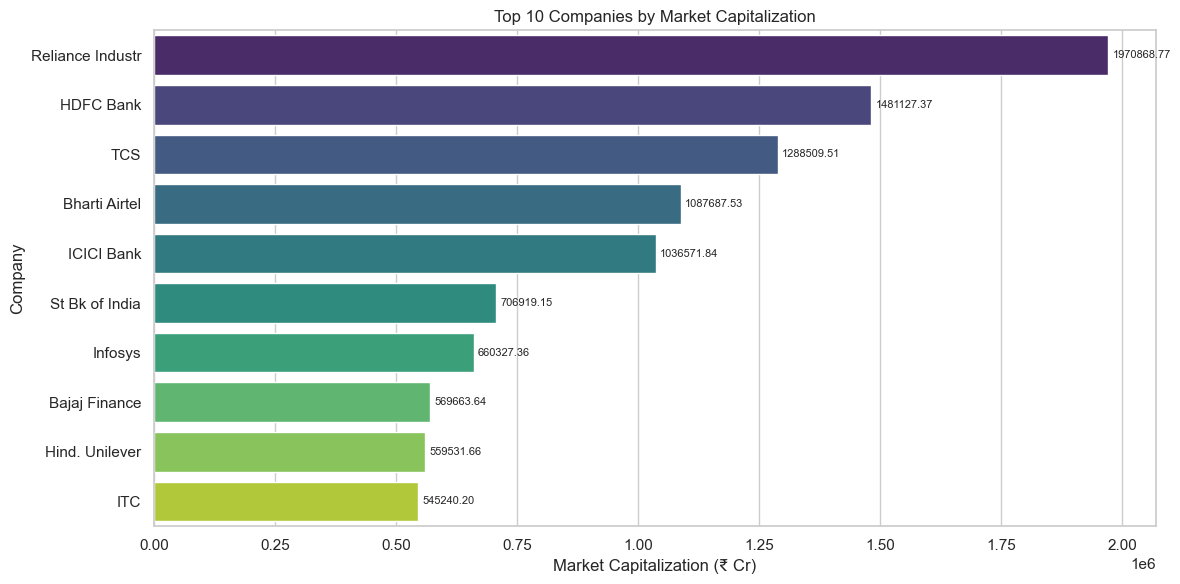

In [6]:
# 1. Top 10 Companies by Market Capitalization
top10_marcap = df.nlargest(10, "MarCap")
plt.figure()
ax = sns.barplot(x="MarCap", y="Name", data=top10_marcap, palette="viridis")
plt.title("Top 10 Companies by Market Capitalization")
plt.xlabel("Market Capitalization (₹ Cr)")
plt.ylabel("Company")
add_labels(ax)
plt.tight_layout() 
plt.show() 

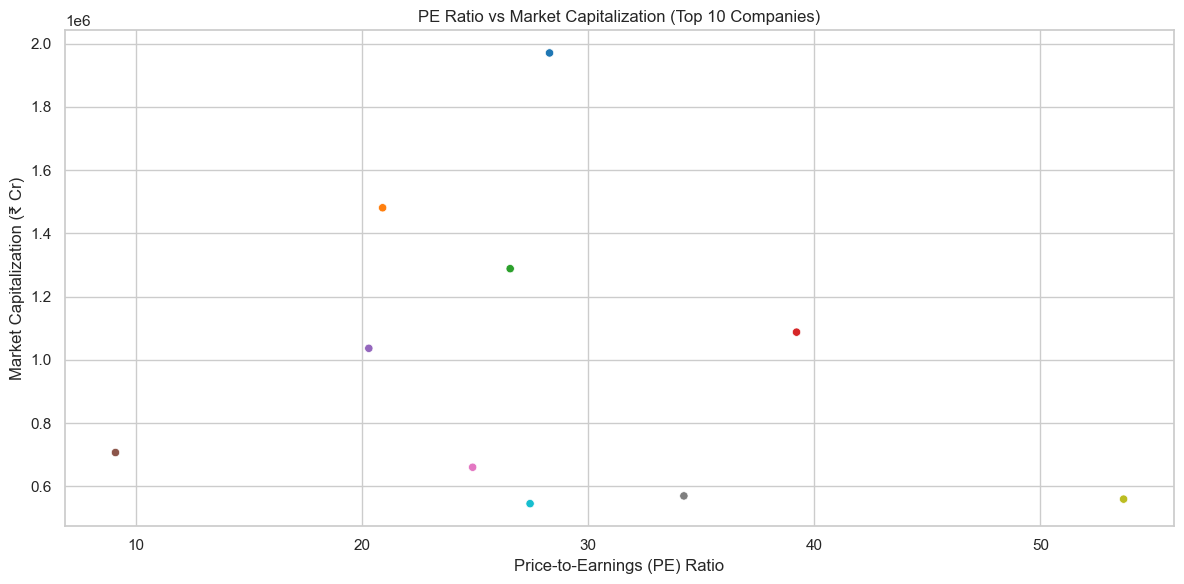

In [7]:
# 2. PE vs Market Cap
plt.figure()
sns.scatterplot(x="PE", y="MarCap", hue="Name", data=top10_marcap, palette="tab10", legend=False)
plt.title("PE Ratio vs Market Capitalization (Top 10 Companies)")
plt.xlabel("Price-to-Earnings (PE) Ratio")
plt.ylabel("Market Capitalization (₹ Cr)")
plt.tight_layout()
plt.show()  

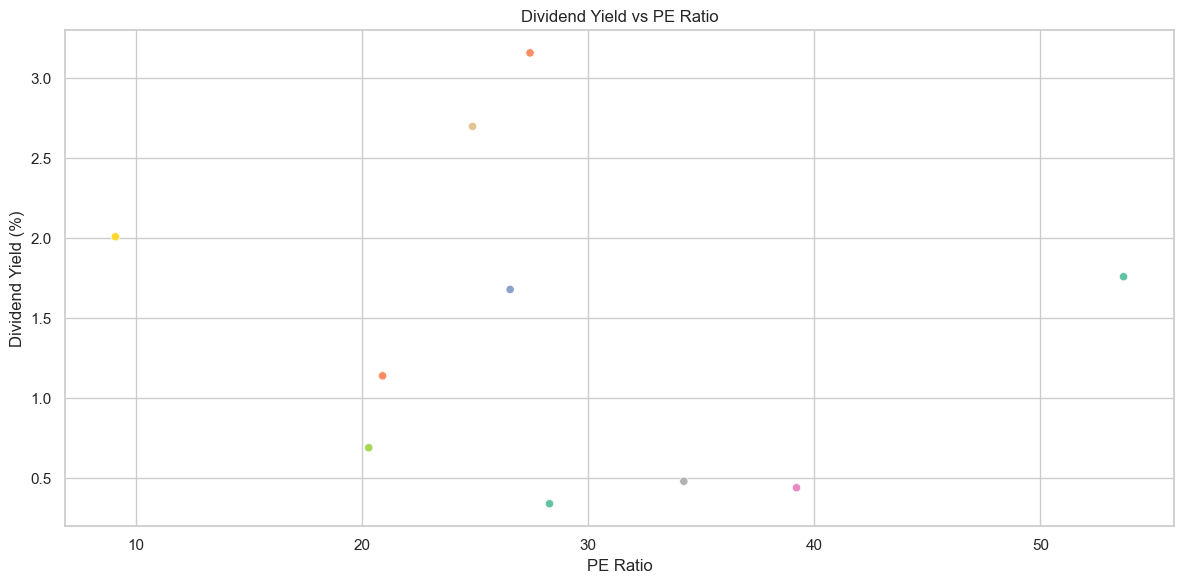

In [8]:
# 3. Dividend Yield vs PE Ratio
plt.figure()
sns.scatterplot(x="PE", y="DivYld", hue="Name", data=top10_marcap, palette="Set2", legend=False)
plt.title("Dividend Yield vs PE Ratio")
plt.xlabel("PE Ratio")
plt.ylabel("Dividend Yield (%)")
plt.tight_layout()
plt.show()  

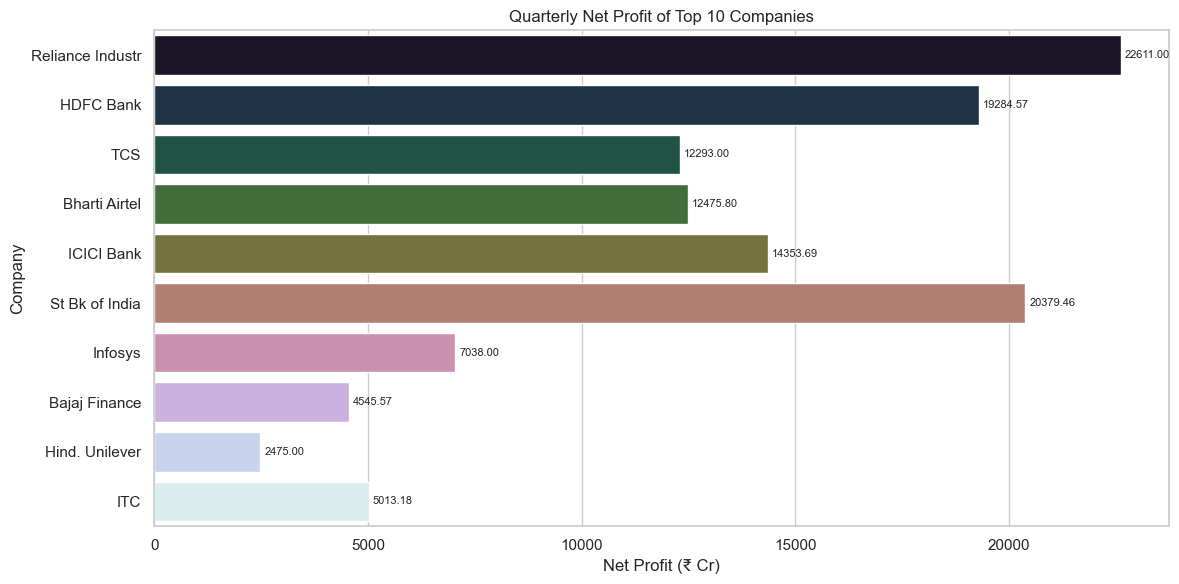

In [9]:
# 4. Net Profit (Quarter) of Top 10 Companies
plt.figure()
ax = sns.barplot(x="NPQtr", y="Name", data=top10_marcap, palette="cubehelix")
plt.title("Quarterly Net Profit of Top 10 Companies")
plt.xlabel("Net Profit (₹ Cr)")
plt.ylabel("Company")
add_labels(ax)
plt.tight_layout()
plt.show()  

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


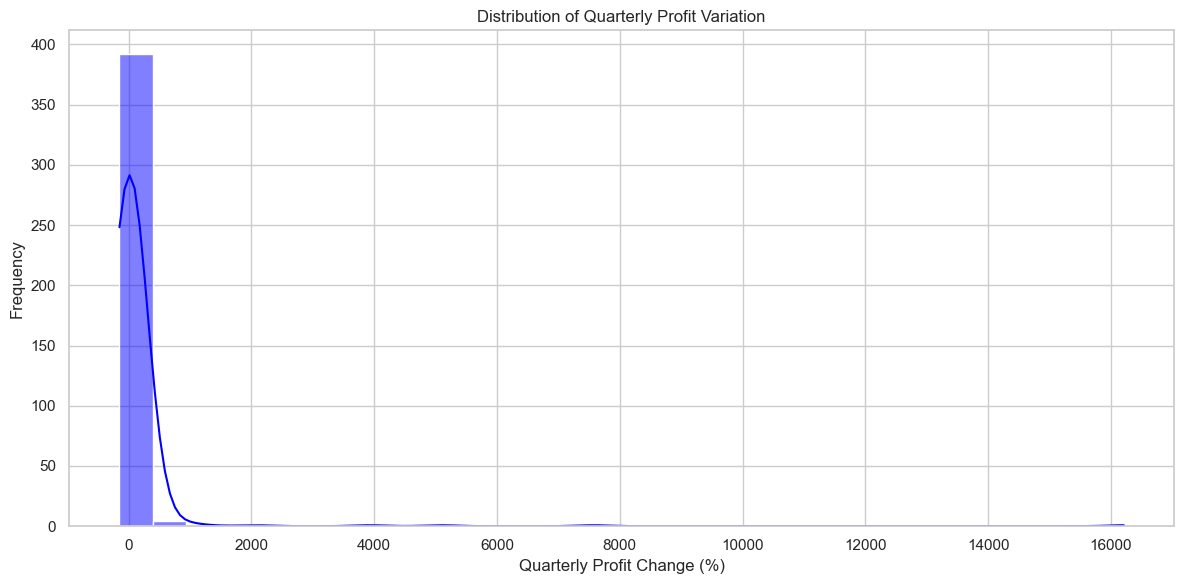

In [10]:
# 5. Quarterly Profit Variation Histogram
plt.figure()
sns.histplot(df["QtrProfitVar"], bins=30, kde=True, color="blue")
plt.title("Distribution of Quarterly Profit Variation")
plt.xlabel("Quarterly Profit Change (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show() 

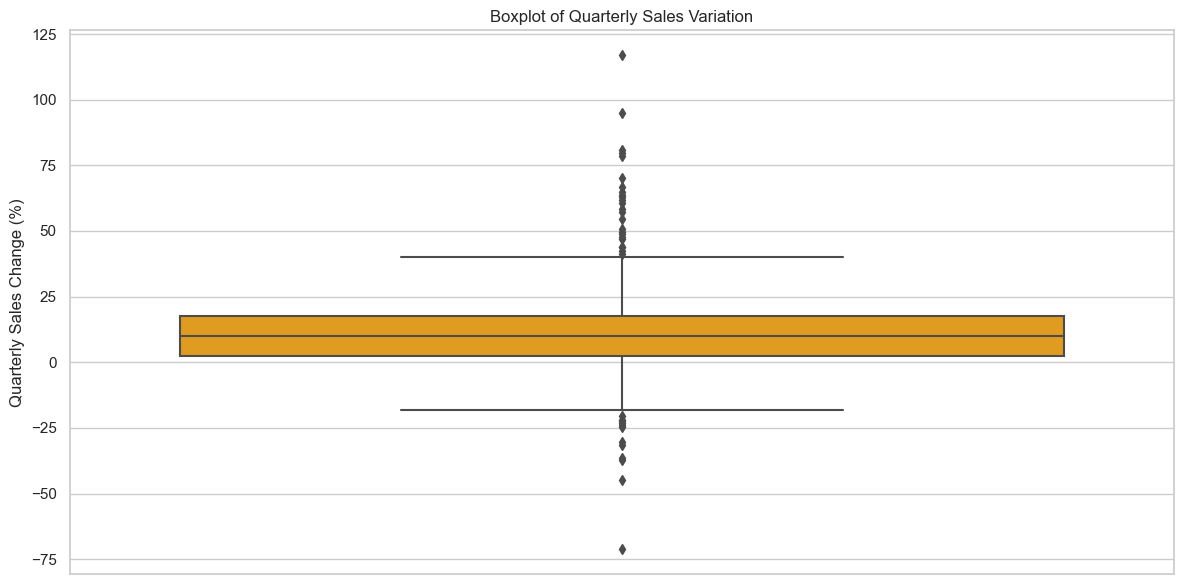

In [11]:
# 6. Quarterly Sales Variation Boxplot
plt.figure()
sns.boxplot(y=df["QtrSalesVar"], color="orange")
plt.title("Boxplot of Quarterly Sales Variation")
plt.ylabel("Quarterly Sales Change (%)")
plt.tight_layout()
plt.show() 

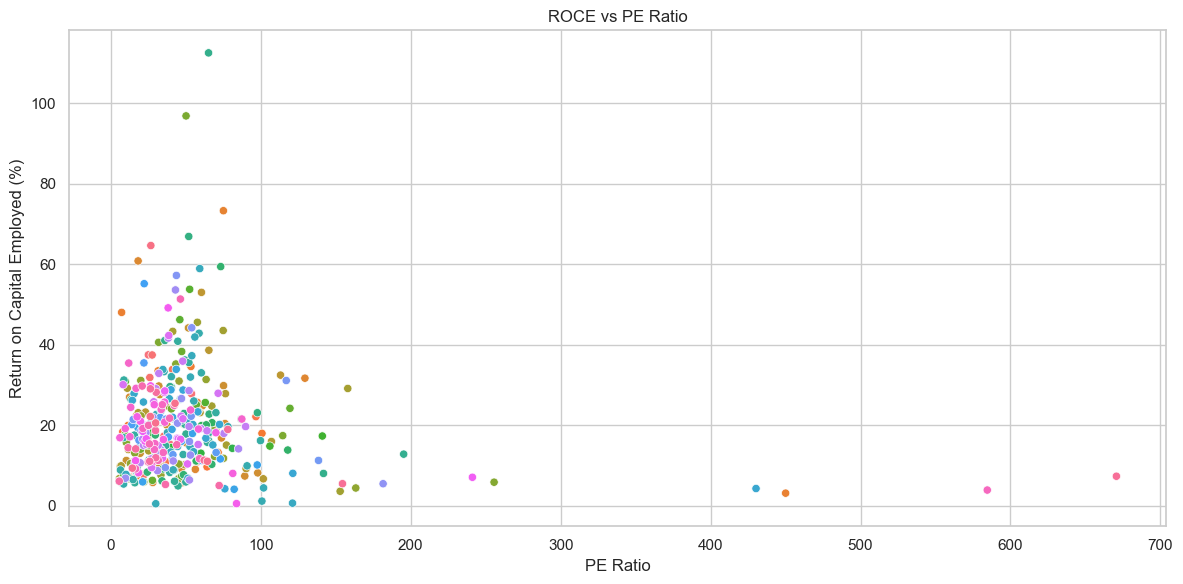

In [12]:
# 7. ROCE vs PE
plt.figure()
sns.scatterplot(x="PE", y="ROCE", data=df, hue="Name", legend=False)
plt.title("ROCE vs PE Ratio")
plt.xlabel("PE Ratio")
plt.ylabel("Return on Capital Employed (%)")
plt.tight_layout()
plt.show() 

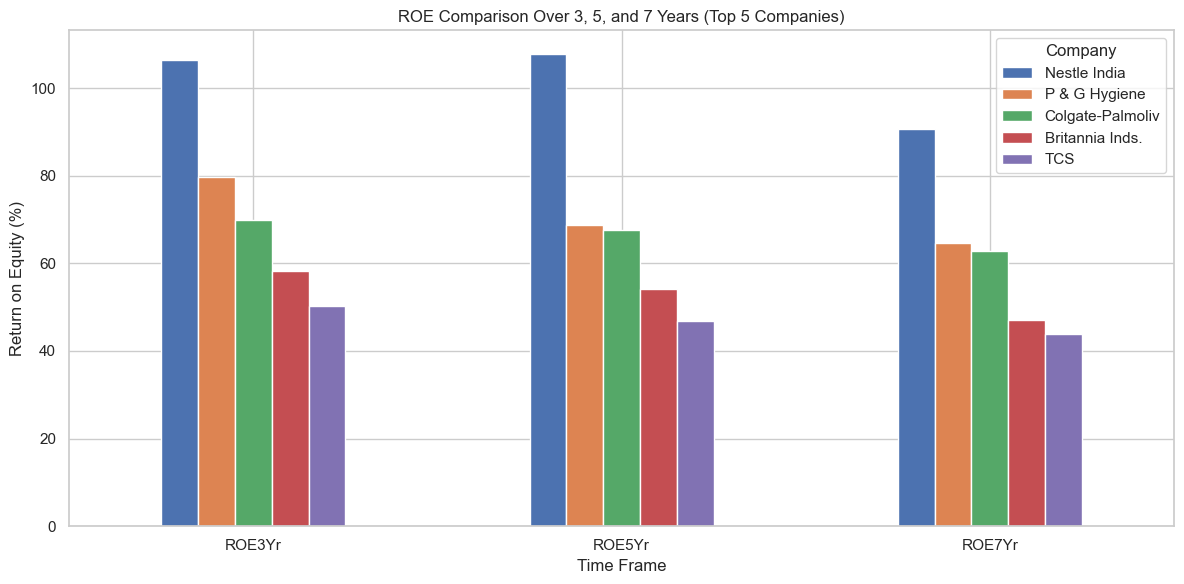

In [13]:
# 8. ROE over Time (3Yr, 5Yr, 7Yr) Comparison for Top 5
top5_roe = df.nlargest(5, "ROE5Yr")[["Name", "ROE3Yr", "ROE5Yr", "ROE7Yr"]].set_index("Name")
top5_roe.T.plot(kind="bar", rot=0)
plt.title("ROE Comparison Over 3, 5, and 7 Years (Top 5 Companies)")
plt.ylabel("Return on Equity (%)")
plt.xlabel("Time Frame")
plt.legend(title="Company")
plt.tight_layout()
plt.show()  

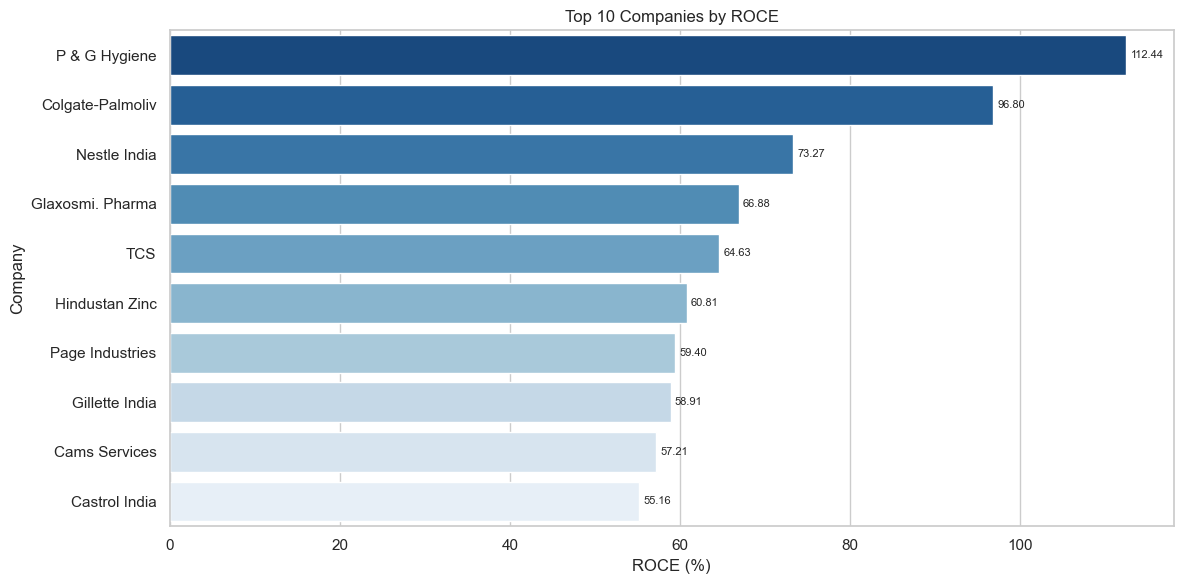

In [14]:
# 9. Top 10 Companies by ROCE
top10_roce = df.nlargest(10, "ROCE")
plt.figure()
ax = sns.barplot(x="ROCE", y="Name", data=top10_roce, palette="Blues_r")
plt.title("Top 10 Companies by ROCE")
plt.xlabel("ROCE (%)")
plt.ylabel("Company")
add_labels(ax)
plt.tight_layout()
plt.show()  

C:\Users\karti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


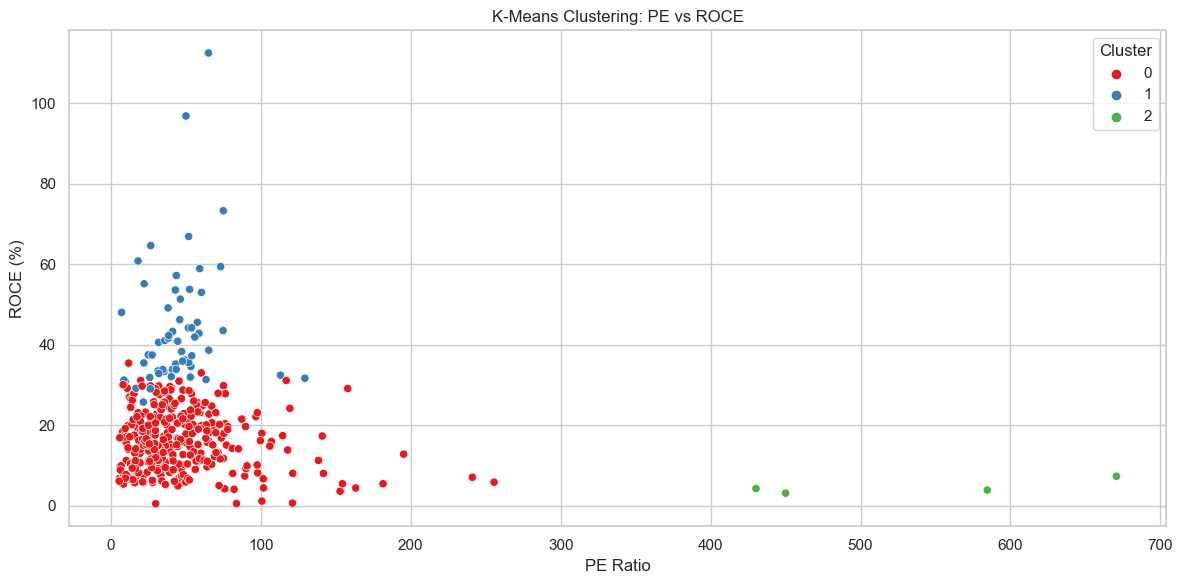

In [52]:
# 10. K-Means Clustering (PE, ROCE, ROE3Yr)
cluster_df = df[["PE", "ROCE", "ROE3Yr"]].copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(cluster_df)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled)
df["Cluster"] = kmeans.labels_

plt.figure()
sns.scatterplot(x="PE", y="ROCE", hue="Cluster", data=df, palette="Set1")
plt.title("K-Means Clustering: PE vs ROCE")
plt.xlabel("PE Ratio")
plt.ylabel("ROCE (%)")
plt.tight_layout()
plt.show() 

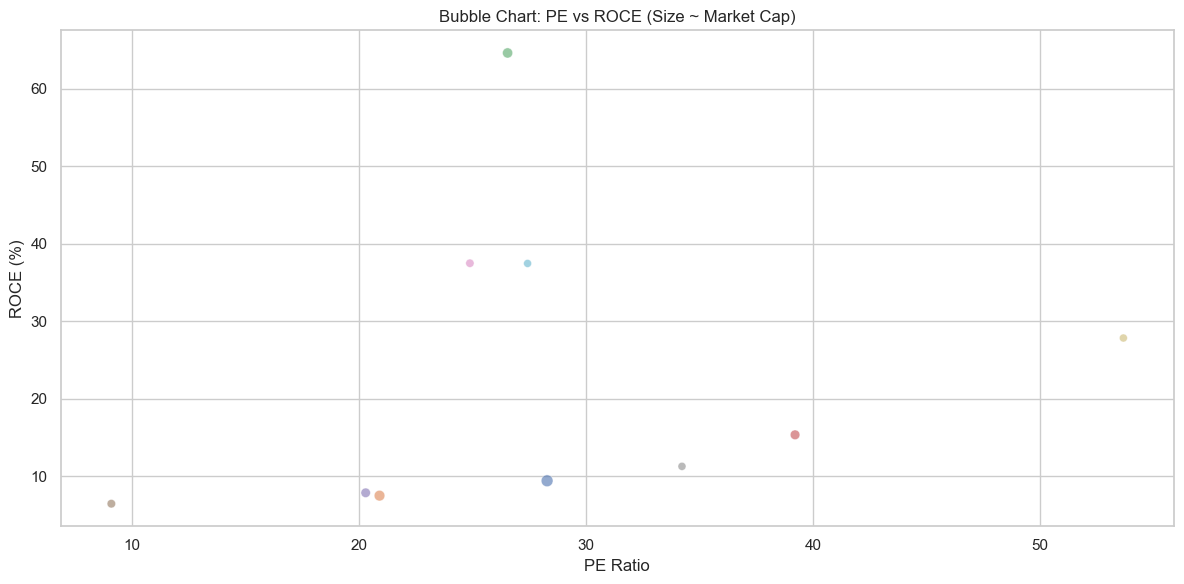

In [53]:
# 11. Bubble Chart: PE vs ROCE with Market Cap
plt.figure()
sizes = df["MarCap"] / 500  # Scale down for plotting
sns.scatterplot(x="PE", y="ROCE", size=sizes, hue="Name", data=top10_marcap, legend=False, alpha=0.6)
plt.title("Bubble Chart: PE vs ROCE (Size ~ Market Cap)")
plt.xlabel("PE Ratio")
plt.ylabel("ROCE (%)")
plt.tight_layout()
plt.show() 

In [15]:
# 12. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop("Cluster", axis=1).select_dtypes(include='float64').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Financial Metrics")
plt.tight_layout()
plt.show() 

KeyError: "['Cluster'] not found in axis"

<Figure size 1000x800 with 0 Axes>

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


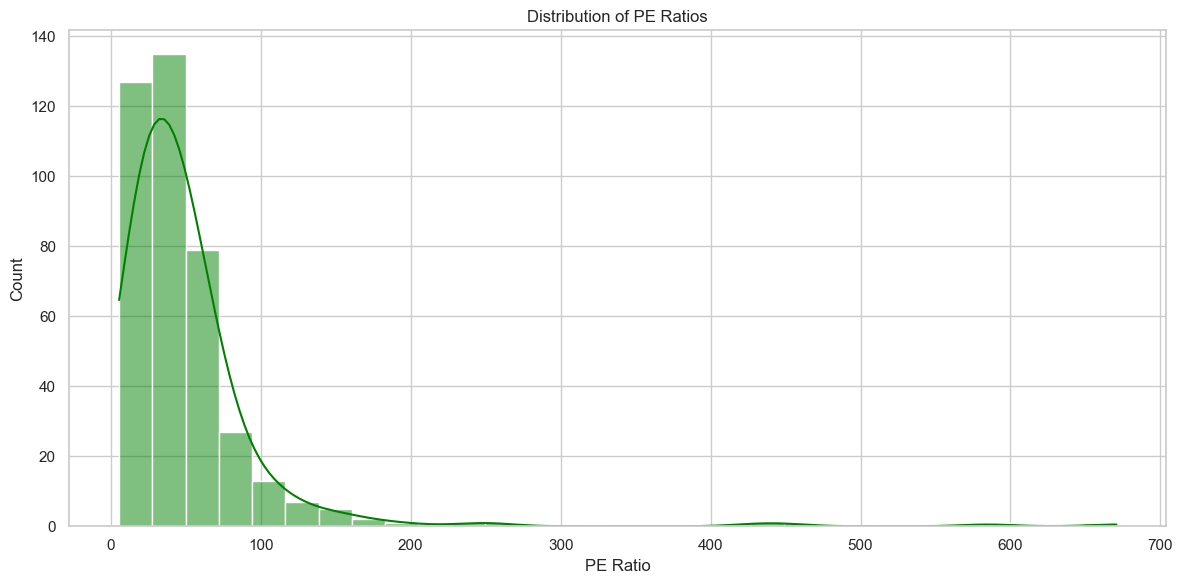

In [55]:
# 13. PE Distribution
plt.figure()
sns.histplot(df["PE"], bins=30, color="green", kde=True)
plt.title("Distribution of PE Ratios")
plt.xlabel("PE Ratio")
plt.ylabel("Count") 
plt.tight_layout()
plt.show()


C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


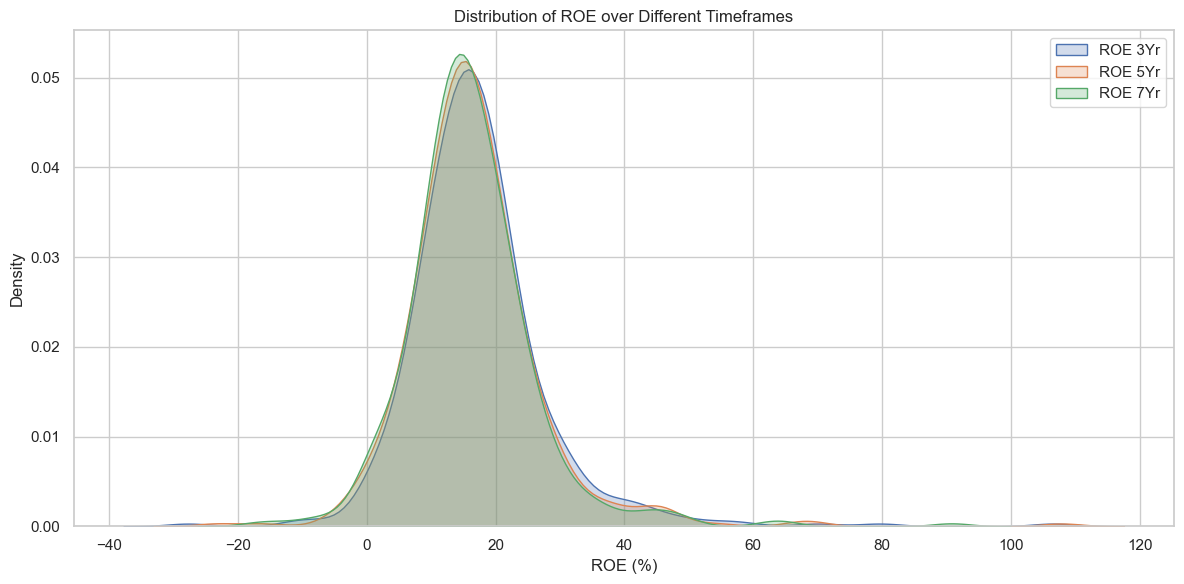

In [56]:
# 14. ROE Distributions (3Yr/5Yr/7Yr)
plt.figure()
sns.kdeplot(df["ROE3Yr"], label="ROE 3Yr", fill=True)
sns.kdeplot(df["ROE5Yr"], label="ROE 5Yr", fill=True)
sns.kdeplot(df["ROE7Yr"], label="ROE 7Yr", fill=True)
plt.title("Distribution of ROE over Different Timeframes")
plt.xlabel("ROE (%)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


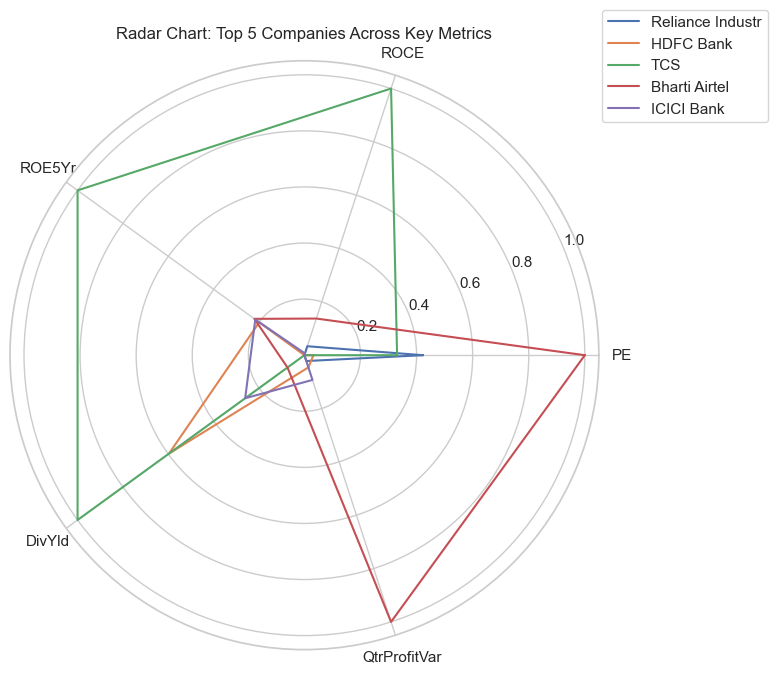

In [57]:

# 15. Radar Chart for Top 5 Companies on Multiple Metrics
from math import pi

top5 = df.nlargest(5, "MarCap").copy()
metrics = ["PE", "ROCE", "ROE5Yr", "DivYld", "QtrProfitVar"]
scaled_data = MinMaxScaler().fit_transform(top5[metrics])
scaled_df = pd.DataFrame(scaled_data, columns=metrics)
scaled_df["Name"] = top5["Name"].values

# Radar chart setup
labels = metrics
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i in range(5):
    values = scaled_df.iloc[i][metrics].tolist()
    values += values[:1]
    plt.polar(angles, values, label=scaled_df.iloc[i]["Name"])
plt.xticks(angles[:-1], labels)
plt.title("Radar Chart: Top 5 Companies Across Key Metrics")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show() 